## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Helping functions

In [2]:
def plotall(loss_history, thetas_history):

    # number of thetas
    n_thetas = thetas_history.shape[1]

    # plot loss vs iterations
    plt.plot(loss_history, '-m.', markersize=12)
    plt.grid("True")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.show()

    # plot loss vs thetas
    fig, axes = plt.subplots(nrows=n_thetas,
                             ncols=1,
                             figsize=(6, 6 * n_thetas))
    plt.suptitle("Loss vs thetas")
    for i in range(0, n_thetas):
        axes[i].grid()
        axes[i].plot(thetas_history[:, i], loss_history, '-m.', markersize=12)
        axes[i].set_title(f"Theta {i}")
        axes[i].set_xlabel(f"Theta{i}")
        axes[i].set_ylabel("loss")
    plt.show()

In [3]:
def minmaxscale(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

## The data

In [4]:
x = np.linspace(0,20)
a=-2
b=1
y=a*x+b

In [5]:
a1 = np.linspace(0, 20)
a2 = np.linspace(10, 100)
x1 = np.column_stack((a1, a2))
y1 = a1 + 2 * a2 + 3

In [6]:
data = np.genfromtxt('MultiVarLR.csv', delimiter=',')
x2 = data[:, :-1]
y2 = data[:, -1]

## BFGS algoritm for multivariate

In [8]:
def BFGS(x,
         y,
         lr,
         max_itr=500,
         scale=False,
         gra_threshold=.01,
         conv_threshold=.01):

    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # append column of ones
    x = np.column_stack((np.ones(x.shape[0]), x))

    # number of rows and columns
    n, m = x.shape[0], x.shape[1]

    # initializing thetas n -1
    thetas_n_1 = np.zeros(m)
    y_pred_n_1 = x @ thetas_n_1
    error_n_1 = y_pred_n_1 - y
    gradient_n_1 = (1 / n) * x.T @ error_n_1

    # initializing thetas n
    thetas_n = np.empty(m)
    thetas_n.fill(.01)
    loss_history = []
    thetas_history = np.array(thetas_n)
    j = np.inf
    I = np.identity(m)
    B0 = I

    for i in range(1, max_itr + 1):
        print(f"****************** Iteration {i} ********************\n")
        d_thetas = thetas_n - thetas_n_1

        y_pred_n = x @ thetas_n
        print(f"h(x):{y_pred_n}\n")

        error_n = y_pred_n - y
        print(f"Error Vector: {error_n}\n")

        j_new = (1 / (2 * n)) * (np.linalg.norm(error_n)**2)
        print(f"j_new= {j_new}\n")
        convergence = np.abs(j - j_new)
        j = j_new
        loss_history.append(j)
        print(f"j= {j}\n")

        gradient_n = (1 / n) * x.T @ error_n
        print(f"Gradient Vector:{gradient_n}\n")

        gradient_norm = np.linalg.norm(gradient_n)
        print(f"Gradient Vector Norm:{gradient_norm}\n")

        d_grad = gradient_n - gradient_n_1
        a = d_thetas.reshape(-1, 1)
        b = d_grad.reshape(-1, 1)
        B1 = (I - (a @ b.T) /
              (b.T @ a)) @ B0 @ (I - (b @ a.T) /
                                 (b.T @ a)) + a @ a.T / (b.T @ a)
        print(B1)
        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} iterations\n")
            print(f"thetas_Opt= {thetas_n}\n")
            print(f"Error Vector: {error_n}\n")
            print(f"Cost= {j}\n")
            print(f"h(x) = y_predict:{y_pred_n}\n")
            print(f"y_actual:{y}\n")
            break

        thetas_n_1 = thetas_n
        thetas_n = thetas_n - (lr * np.matmul(B1, gradient_n))
        print(f"thetas_new= {thetas_n}\n")
        B0 = B1

        thetas_history = np.row_stack((thetas_history, thetas_n))
    else:
        thetas_history = thetas_history[:-1, :]

    return thetas_n, y_pred_n, loss_history, thetas_history

# Example 1

In [24]:
thetas, y_pred, loss_history, thetas_history = BFGS(x,
                                                    y,
                                                    scale=False,
                                                    lr=.7,
                                                    max_itr=500,
                                                    gra_threshold=.001,
                                                    conv_threshold=.001)

****************** Iteration 1 ********************

h(x):[0.01       0.01408163 0.01816327 0.0222449  0.02632653 0.03040816
 0.0344898  0.03857143 0.04265306 0.04673469 0.05081633 0.05489796
 0.05897959 0.06306122 0.06714286 0.07122449 0.07530612 0.07938776
 0.08346939 0.08755102 0.09163265 0.09571429 0.09979592 0.10387755
 0.10795918 0.11204082 0.11612245 0.12020408 0.12428571 0.12836735
 0.13244898 0.13653061 0.14061224 0.14469388 0.14877551 0.15285714
 0.15693878 0.16102041 0.16510204 0.16918367 0.17326531 0.17734694
 0.18142857 0.1855102  0.18959184 0.19367347 0.1977551  0.20183673
 0.20591837 0.21      ]

Error Vector: [-0.99       -0.16959184  0.65081633  1.47122449  2.29163265  3.11204082
  3.93244898  4.75285714  5.57326531  6.39367347  7.21408163  8.0344898
  8.85489796  9.67530612 10.49571429 11.31612245 12.13653061 12.95693878
 13.77734694 14.5977551  15.41816327 16.23857143 17.05897959 17.87938776
 18.69979592 19.52020408 20.34061224 21.16102041 21.98142857 22.80183673
 23

In [25]:
print(f"r2_score: {r2_score(y,y_pred)}")

r2_score: 0.980460597461674


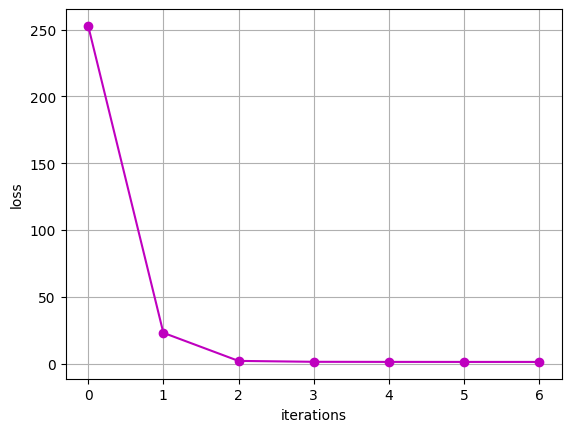

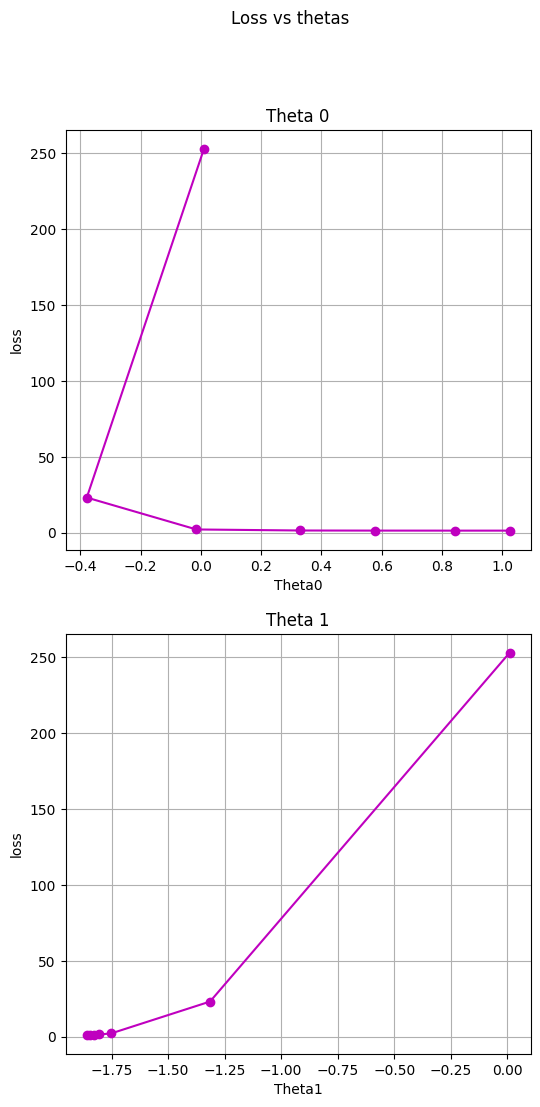

In [26]:
plotall(loss_history, thetas_history)

# Example 2

In [28]:
thetas, y_pred, loss_history, thetas_history = BFGS(x1,
                                                    y1,
                                                    scale=True,
                                                    lr=.99,
                                                    max_itr=500,
                                                    gra_threshold=.001,
                                                    conv_threshold=.001)

****************** Iteration 1 ********************

h(x):[0.01       0.01040816 0.01081633 0.01122449 0.01163265 0.01204082
 0.01244898 0.01285714 0.01326531 0.01367347 0.01408163 0.0144898
 0.01489796 0.01530612 0.01571429 0.01612245 0.01653061 0.01693878
 0.01734694 0.0177551  0.01816327 0.01857143 0.01897959 0.01938776
 0.01979592 0.02020408 0.02061224 0.02102041 0.02142857 0.02183673
 0.0222449  0.02265306 0.02306122 0.02346939 0.02387755 0.02428571
 0.02469388 0.02510204 0.0255102  0.02591837 0.02632653 0.02673469
 0.02714286 0.02755102 0.02795918 0.02836735 0.02877551 0.02918367
 0.02959184 0.03      ]

Error Vector: [ -22.99        -27.07122449  -31.15244898  -35.23367347  -39.31489796
  -43.39612245  -47.47734694  -51.55857143  -55.63979592  -59.72102041
  -63.8022449   -67.88346939  -71.96469388  -76.04591837  -80.12714286
  -84.20836735  -88.28959184  -92.37081633  -96.45204082 -100.53326531
 -104.6144898  -108.69571429 -112.77693878 -116.85816327 -120.93938776
 -125.0206122

In [29]:
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.9999951002630632


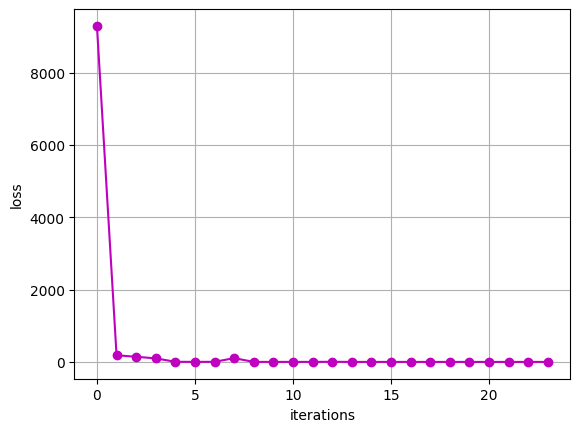

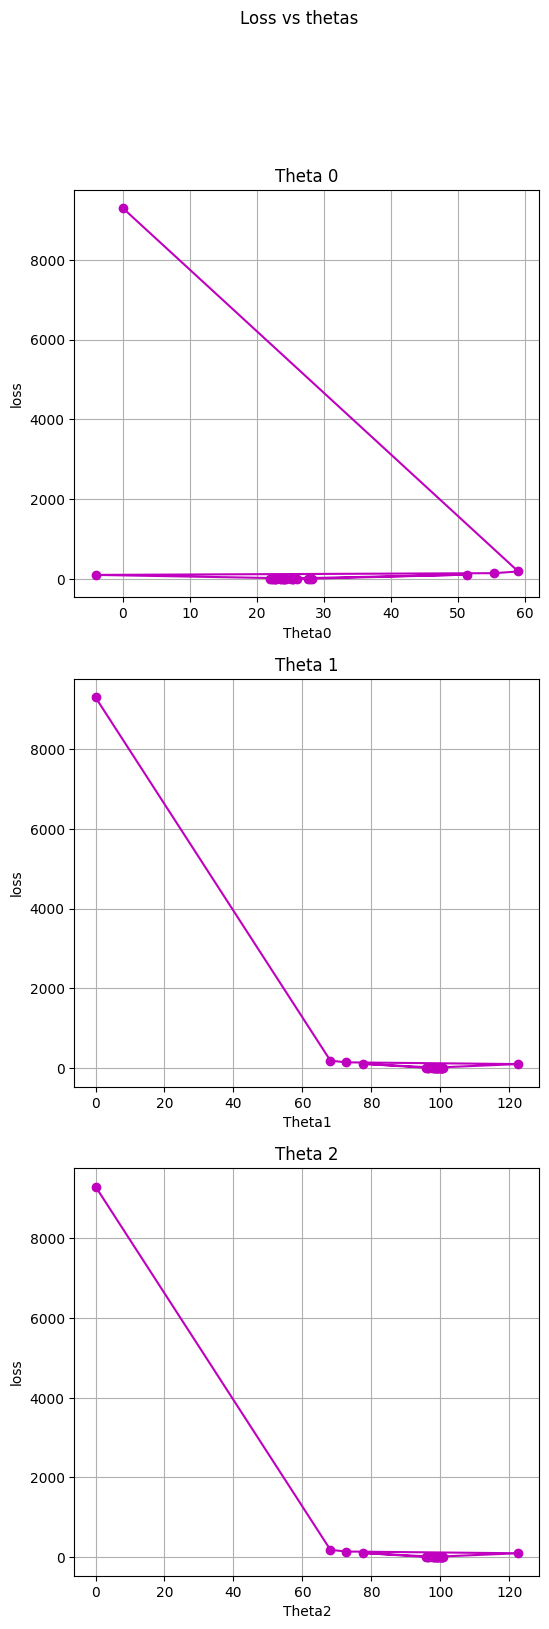

In [30]:
plotall(loss_history, thetas_history)

# Example 3

In [34]:
thetas, y_pred, loss_history, thetas_history = BFGS(x2,
                                                    y2,
                                                    scale=True,
                                                    lr=1,
                                                    max_itr=500,
                                                    gra_threshold=.01,
                                                    conv_threshold=.01)

****************** Iteration 1 ********************

h(x):[0.02628903 0.03590912 0.03500305 0.04       0.02248561 0.01122449
 0.0247633  0.01303419 0.0322872  0.02847933 0.02310518 0.02256995
 0.03681083 0.02706907 0.0249973  0.0367681  0.02479234 0.03384476
 0.03410239 0.0283308  0.03261294 0.03243782 0.03010858 0.02658931
 0.03792735]

Error Vector: [-151.97371097 -184.96409088 -179.96499695 -195.96       -141.97751439
 -100.98877551 -148.9752367  -114.98696581 -174.9677128  -163.97152067
 -140.97689482 -140.97743005 -183.96318917 -151.97293093 -147.9750027
 -191.9632319  -146.97520766 -182.96615524 -176.96589761 -158.9716692
 -176.96738706 -174.96756218 -174.96989142 -148.97341069 -191.96207265]

j_new= 13401.138699640916

j= 13401.138699640916

Gradient Vector:[-162.01113832 -111.40638088 -109.46752252 -101.20084346]

Gradient Vector Norm:246.74630664685364

[[ 0.7176588  -0.1883021  -0.18390691 -0.16739877]
 [-0.1883021   0.905737   -0.08986781 -0.07335967]
 [-0.18390691 -0.089867

In [32]:
print(f"r2_score: {r2_score(y2,y_pred)}")

r2_score: 0.9795747429177831


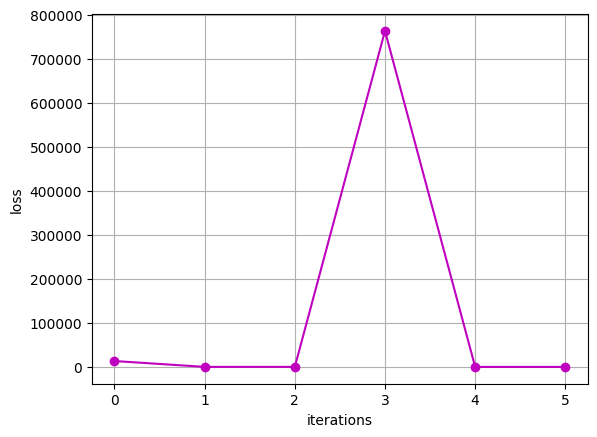

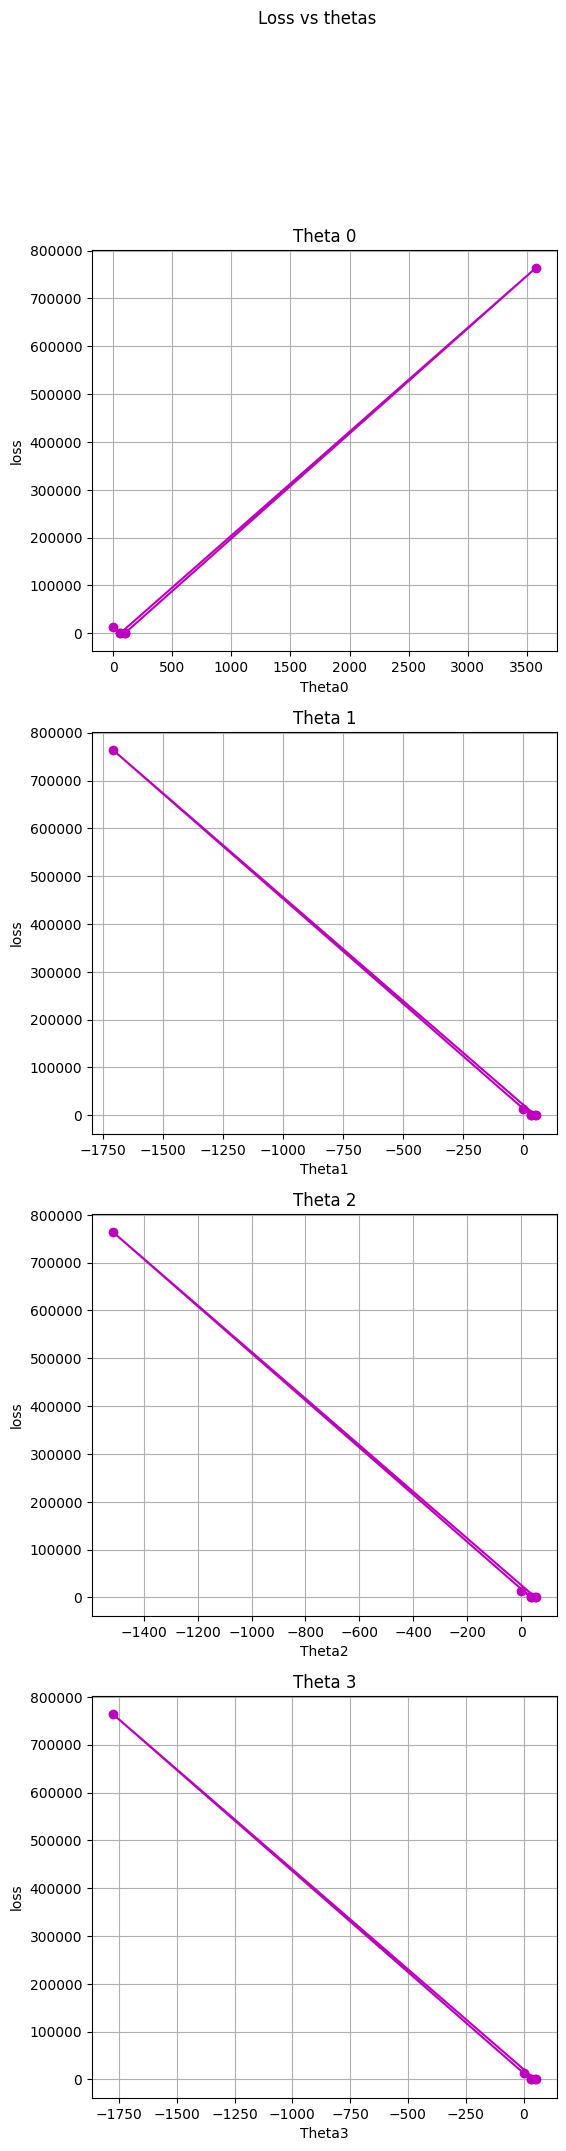

In [33]:
plotall(loss_history, thetas_history)